# 10 Minutes to pandas

通常，我们引入如下的库：

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
s = pd.Series([1, 3, 4, np.nan, 6, 8])
print(s)

0    1.0
1    3.0
2    4.0
3    NaN
4    6.0
5    8.0
dtype: float64


0    1.0
1    3.0
2    4.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [5]:
dates = pd.date_range('20130101', periods=6)
print(dates)

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')


In [3]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
print(df)
df

                   A         B         C         D
2013-01-01 -0.719020 -1.217340 -2.133706 -1.771980
2013-01-02 -0.613888  0.304153 -0.799573  0.188373
2013-01-03 -1.352677 -0.319941 -1.201760  0.632653
2013-01-04  1.086457  0.010433  0.546495  1.895779
2013-01-05 -1.173755 -0.796246  0.329580  0.366709
2013-01-06 -0.982249  0.197250 -0.384817 -0.693942


,A,B,C,D
2013-01-01,-0.719020,-1.217340,-2.133706,-1.771980
2013-01-02,-0.613888,0.304153,-0.799573,0.188373
2013-01-03,-1.352677,-0.319941,-1.201760,0.632653
2013-01-04,1.086457,0.010433,0.546495,1.895779
2013-01-05,-1.173755,-0.796246,0.329580,0.366709
2013-01-06,-0.982249,0.197250,-0.384817,-0.693942


In [4]:
df.dtypes

A    float64
B    float64
C    float64
D    float64
dtype: object

In [6]:
df[['A', 'B']]

,A,B
2013-01-01,-0.719020,-1.217340
2013-01-02,-0.613888,0.304153
2013-01-03,-1.352677,-0.319941
2013-01-04,1.086457,0.010433
2013-01-05,-1.173755,-0.796246
2013-01-06,-0.982249,0.197250


In [14]:
df[0:3]

,A,B,C,D
2013-01-01,-0.719020,-1.217340,-2.133706,-1.771980
2013-01-02,-0.613888,0.304153,-0.799573,0.188373
2013-01-03,-1.352677,-0.319941,-1.201760,0.632653


In [9]:
df.iloc[0]

A   -0.719020
B   -1.217340
C   -2.133706
D   -1.771980
Name: 2013-01-01 00:00:00, dtype: float64

In [10]:
df.loc[dates[0:3]]

,A,B,C,D
2013-01-01,-0.719020,-1.217340,-2.133706,-1.771980
2013-01-02,-0.613888,0.304153,-0.799573,0.188373
2013-01-03,-1.352677,-0.319941,-1.201760,0.632653


In [13]:
df.loc[:, ['A']]

,A
2013-01-01,-0.719020
2013-01-02,-0.613888
2013-01-03,-1.352677
2013-01-04,1.086457
2013-01-05,-1.173755
2013-01-06,-0.982249


In [16]:
df.iloc[0:3]

,A,B,C,D
2013-01-01,-0.719020,-1.217340,-2.133706,-1.771980
2013-01-02,-0.613888,0.304153,-0.799573,0.188373
2013-01-03,-1.352677,-0.319941,-1.201760,0.632653


In [17]:
df.iloc[:, 0:2]

,A,B
2013-01-01,-0.719020,-1.217340
2013-01-02,-0.613888,0.304153
2013-01-03,-1.352677,-0.319941
2013-01-04,1.086457,0.010433
2013-01-05,-1.173755,-0.796246
2013-01-06,-0.982249,0.197250


In [20]:
df.loc[[dates[0], dates[2]], ['A', 'C']]

,A,C
2013-01-01,-0.719020,-2.133706
2013-01-03,-1.352677,-1.201760


In [9]:
df2 = pd.DataFrame({'A': 1.,
                    'B': pd.Timestamp('20170102'), 
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'), 
                    'D': np.array([3] * 4, dtype='int32'), 
                    'E': pd.Categorical(['test', 'train', 'test', 'train']), 
                    'F': 'foo'})
df2

,A,B,C,D,E,F
0,1.0,2017-01-02,1.0,3,test,foo
1,1.0,2017-01-02,1.0,3,train,foo
2,1.0,2017-01-02,1.0,3,test,foo
3,1.0,2017-01-02,1.0,3,train,foo


In [21]:
df.iloc[[0, 2], [0, 2]]

,A,C
2013-01-01,-0.719020,-2.133706
2013-01-03,-1.352677,-1.201760


In [22]:
%timeit -n 100 df.iloc[0, 0]
%timeit -n 100 df.iat[0, 0]

df.iat[0, 0]

25.2 µs ± 6.07 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
9.2 µs ± 2.28 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


-0.71901964786930939

In [10]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [23]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [24]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns)+['E'])
df1

,A,B,C,D,E
2013-01-01,-0.719020,-1.217340,-2.133706,-1.771980,NaN
2013-01-02,-0.613888,0.304153,-0.799573,0.188373,NaN
2013-01-03,-1.352677,-0.319941,-1.201760,0.632653,NaN
2013-01-04,1.086457,0.010433,0.546495,1.895779,NaN


In [25]:
df1.loc[dates[0:1], 'E'] = 1
df1

,A,B,C,D,E
2013-01-01,-0.719020,-1.217340,-2.133706,-1.771980,1.0
2013-01-02,-0.613888,0.304153,-0.799573,0.188373,NaN
2013-01-03,-1.352677,-0.319941,-1.201760,0.632653,NaN
2013-01-04,1.086457,0.010433,0.546495,1.895779,NaN


In [26]:
df1.dropna(how='any')

,A,B,C,D,E
2013-01-01,-0.71902,-1.21734,-2.133706,-1.77198,1.0


In [27]:
df1.fillna(value=5)

,A,B,C,D,E
2013-01-01,-0.719020,-1.217340,-2.133706,-1.771980,1.0
2013-01-02,-0.613888,0.304153,-0.799573,0.188373,5.0
2013-01-03,-1.352677,-0.319941,-1.201760,0.632653,5.0
2013-01-04,1.086457,0.010433,0.546495,1.895779,5.0


In [29]:
pd.isnull(df1)

,A,B,C,D,E
2013-01-01,False,False,False,False,False
2013-01-02,False,False,False,False,True
2013-01-03,False,False,False,False,True
2013-01-04,False,False,False,False,True


In [28]:
df1

,A,B,C,D,E
2013-01-01,-0.719020,-1.217340,-2.133706,-1.771980,1.0
2013-01-02,-0.613888,0.304153,-0.799573,0.188373,NaN
2013-01-03,-1.352677,-0.319941,-1.201760,0.632653,NaN
2013-01-04,1.086457,0.010433,0.546495,1.895779,NaN


In [11]:
df.head()

,A,B,C,D
2013-01-01,-0.671486,1.162787,-1.539575,-0.719260
2013-01-02,-1.670410,0.996455,0.143798,0.134089
2013-01-03,0.839324,-0.453381,1.149539,1.072353
2013-01-04,0.253500,-0.512304,0.553672,1.094580
2013-01-05,-0.879173,-0.049106,-0.009282,-0.696194


In [30]:
np.cumsum

<function numpy.core.fromnumeric.cumsum>

In [31]:
df.mean()

A   -0.625855
B   -0.303615
C   -0.607297
D    0.102932
dtype: float64

In [12]:
df.tail()

,A,B,C,D
2013-01-02,-1.670410,0.996455,0.143798,0.134089
2013-01-03,0.839324,-0.453381,1.149539,1.072353
2013-01-04,0.253500,-0.512304,0.553672,1.094580
2013-01-05,-0.879173,-0.049106,-0.009282,-0.696194
2013-01-06,0.288260,-0.522052,-1.533295,1.695103


In [32]:
df.mean(1)

2013-01-01   -1.460511
2013-01-02   -0.230234
2013-01-03   -0.560431
2013-01-04    0.884791
2013-01-05   -0.318428
2013-01-06   -0.465940
Freq: D, dtype: float64

In [36]:
left = pd.DataFrame({'key': ['one', 'two'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['one', 'two'], 'rval': [3, 4]})
print(left)
print(right)

   key  lval
0  one     1
1  two     2
   key  rval
0  one     3
1  two     4


In [37]:
pd.merge(left, right, on='key')

,key,lval,rval
0,one,1,3
1,two,2,4


In [13]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [40]:
df4 = pd.DataFrame({'A': ['foo', 'bar', 'foo'], 
                    'B': ['one', 'two', 'one'], 
                    'C': np.random.randint(0, 10, size=3)
                    })

In [41]:
df4

,A,B,C
0,foo,one,3
1,bar,two,4
2,foo,one,5


In [14]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [42]:
df4.groupby('A')

In [15]:
df.values

array([[-0.67148615,  1.16278689, -1.5395749 , -0.71926043],
       [-1.67040997,  0.99645506,  0.14379818,  0.13408903],
       [ 0.83932357, -0.45338111,  1.14953893,  1.07235311],
       [ 0.25349998, -0.51230394,  0.5536718 ,  1.09457993],
       [-0.87917284, -0.04910583, -0.00928235, -0.69619352],
       [ 0.28825968, -0.52205196, -1.53329493,  1.69510318]])

In [45]:
a = df4.groupby('A').sum()
type(a)

pandas.core.frame.DataFrame

In [16]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.306664,0.103733,-0.205857,0.430112
std,0.927542,0.777611,1.105964,1.013059
min,-1.670410,-0.522052,-1.539575,-0.719260
25%,-0.827251,-0.497573,-1.152292,-0.488623
50%,-0.208993,-0.251243,0.067258,0.603221
75%,0.279570,0.735065,0.451203,1.089023
max,0.839324,1.162787,1.149539,1.695103


In [46]:
a

,C
A,
bar,4
foo,8


In [17]:
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,-0.671486,-1.670410,0.839324,0.253500,-0.879173,0.288260
B,1.162787,0.996455,-0.453381,-0.512304,-0.049106,-0.522052
C,-1.539575,0.143798,1.149539,0.553672,-0.009282,-1.533295
D,-0.719260,0.134089,1.072353,1.094580,-0.696194,1.695103


In [47]:
df4.groupby(['A', 'B']).sum()

,,C
A,B,
bar,two,4
foo,one,8


In [18]:
df.sort_index(ascending=False)

,A,B,C,D
2013-01-06,0.288260,-0.522052,-1.533295,1.695103
2013-01-05,-0.879173,-0.049106,-0.009282,-0.696194
2013-01-04,0.253500,-0.512304,0.553672,1.094580
2013-01-03,0.839324,-0.453381,1.149539,1.072353
2013-01-02,-1.670410,0.996455,0.143798,0.134089
2013-01-01,-0.671486,1.162787,-1.539575,-0.719260


In [53]:
aa = df4.groupby(['A', 'B']).sum()
type(aa)
aa.dtypes

C    int32
dtype: object

In [54]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'], 
                    ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]))
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [56]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df

A         B
first second                    
bar   one     0.123786 -0.577478
      two     0.279348  0.282903
baz   one    -1.525697 -0.479447
      two     1.609173 -1.075646
foo   one    -0.775880 -0.945260
      two     1.011133 -0.252301
qux   one     0.508449 -0.309762
      two     0.458377  0.546821

In [19]:
df.sort_index(axis=0, ascending=True)

,A,B,C,D
2013-01-01,-0.671486,1.162787,-1.539575,-0.719260
2013-01-02,-1.670410,0.996455,0.143798,0.134089
2013-01-03,0.839324,-0.453381,1.149539,1.072353
2013-01-04,0.253500,-0.512304,0.553672,1.094580
2013-01-05,-0.879173,-0.049106,-0.009282,-0.696194
2013-01-06,0.288260,-0.522052,-1.533295,1.695103


In [59]:
df2 = df[:4]
df2

A         B
first second                    
bar   one     0.123786 -0.577478
      two     0.279348  0.282903
baz   one    -1.525697 -0.479447
      two     1.609173 -1.075646

In [60]:
stacked = df2.stack()
stacked

first  second   
bar    one     A    0.123786
               B   -0.577478
       two     A    0.279348
               B    0.282903
baz    one     A   -1.525697
               B   -0.479447
       two     A    1.609173
               B   -1.075646
dtype: float64

In [61]:
stacked.unstack()

A         B
first second                    
bar   one     0.123786 -0.577478
      two     0.279348  0.282903
baz   one    -1.525697 -0.479447
      two     1.609173 -1.075646

In [62]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  0.123786 -1.525697
       B -0.577478 -0.479447
two    A  0.279348  1.609173
       B  0.282903 -1.075646

In [63]:
rng = pd.date_range('20120306 00:00:00', periods=5, fred='D')
rng

DatetimeIndex(['2012-03-06', '2012-03-07', '2012-03-08', '2012-03-09',
               '2012-03-10'],
              dtype='datetime64[ns]', freq='D')

In [64]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-06   -0.373488
2012-03-07   -1.441384
2012-03-08   -1.040056
2012-03-09    0.175651
2012-03-10   -0.453874
Freq: D, dtype: float64

In [65]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00   -0.373488
2012-03-07 00:00:00+00:00   -1.441384
2012-03-08 00:00:00+00:00   -1.040056
2012-03-09 00:00:00+00:00    0.175651
2012-03-10 00:00:00+00:00   -0.453874
Freq: D, dtype: float64

In [66]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00   -0.373488
2012-03-06 19:00:00-05:00   -1.441384
2012-03-07 19:00:00-05:00   -1.040056
2012-03-08 19:00:00-05:00    0.175651
2012-03-09 19:00:00-05:00   -0.453874
Freq: D, dtype: float64

In [72]:
df = pd.DataFrame({'id': list(range(1,7)), 
                   'raw_grade': ['a', 'b', 'b', 'a', 'a', 'e']})
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [68]:
df["raw_grade"] = df["raw_grade"].astype('category')

In [73]:
df['raw_grade']

0    a
1    b
2    b
3    a
4    a
5    e
Name: raw_grade, dtype: object

In [74]:
df["grade"] = df["raw_grade"].astype('category')
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [75]:
df["grade"].cat.categories = ["very good", "good", "very bad"]
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (3, object): [very good, good, very bad]

In [76]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

In [77]:
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


In [85]:
b = df.groupby("grade").size()
type(b)
b.dtypes
b.index

CategoricalIndex(['very bad', 'bad', 'medium', 'good', 'very good'], categories=['very bad', 'bad', 'medium', 'good', 'very good'], ordered=False, name='grade', dtype='category')

In [87]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts.head()

2000-01-01   -1.137865
2000-01-02    0.434041
2000-01-03   -1.414191
2000-01-04    0.675662
2000-01-05   -0.375390
Freq: D, dtype: float64

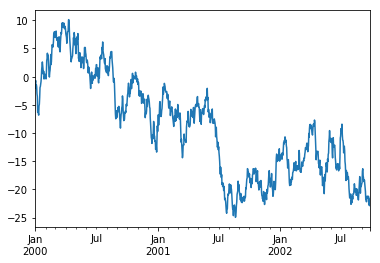

In [88]:
p1 = ts.cumsum().plot()

In [89]:
plt.style.use('ggplot')

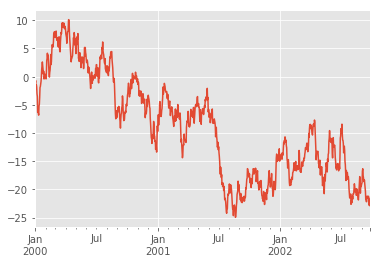

In [90]:
p2 = ts.cumsum().plot()

In [91]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list('ABCD'))

In [92]:
df.head()

,A,B,C,D
2000-01-01,0.813373,-0.295200,-0.164346,0.879837
2000-01-02,-1.021885,2.551986,0.524355,-1.764258
2000-01-03,0.234727,-0.503230,-0.387844,-0.296523
2000-01-04,-0.228308,0.965924,-1.059910,1.368922
2000-01-05,-1.101053,-0.687624,0.572593,-0.708919


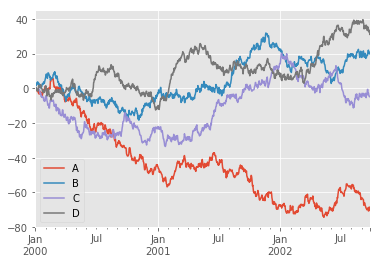

In [93]:
df.cumsum().plot()

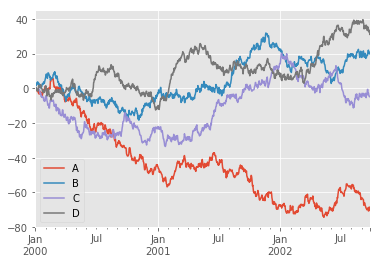

In [94]:
df.apply(np.cumsum).plot()
p = plt.legend(loc="best")

In [96]:
df.head()

,A,B,C,D
2000-01-01,0.813373,-0.295200,-0.164346,0.879837
2000-01-02,-1.021885,2.551986,0.524355,-1.764258
2000-01-03,0.234727,-0.503230,-0.387844,-0.296523
2000-01-04,-0.228308,0.965924,-1.059910,1.368922
2000-01-05,-1.101053,-0.687624,0.572593,-0.708919


In [97]:
df.to_csv('foo.csv')

In [98]:
pd.read_csv("foo.csv").head()

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.813373,-0.295200,-0.164346,0.879837
1,2000-01-02,-1.021885,2.551986,0.524355,-1.764258
2,2000-01-03,0.234727,-0.503230,-0.387844,-0.296523
3,2000-01-04,-0.228308,0.965924,-1.059910,1.368922
4,2000-01-05,-1.101053,-0.687624,0.572593,-0.708919


In [99]:
pd.read_csv('foo.csv', index_col=0).head()

,A,B,C,D
2000-01-01,0.813373,-0.295200,-0.164346,0.879837
2000-01-02,-1.021885,2.551986,0.524355,-1.764258
2000-01-03,0.234727,-0.503230,-0.387844,-0.296523
2000-01-04,-0.228308,0.965924,-1.059910,1.368922
2000-01-05,-1.101053,-0.687624,0.572593,-0.708919


In [100]:
df.to_hdf("foo.h5", "df")

In [101]:
pd.read_hdf("foo.h5", "df").head()

,A,B,C,D
2000-01-01,0.813373,-0.295200,-0.164346,0.879837
2000-01-02,-1.021885,2.551986,0.524355,-1.764258
2000-01-03,0.234727,-0.503230,-0.387844,-0.296523
2000-01-04,-0.228308,0.965924,-1.059910,1.368922
2000-01-05,-1.101053,-0.687624,0.572593,-0.708919


In [102]:
df.to_excel("foo.xlsx", sheet_name='Sheet1')

In [104]:
pd.read_excel("foo.xlsx", index_col=None, na_values=['NA']).head()

,A,B,C,D
2000-01-01,0.813373,-0.295200,-0.164346,0.879837
2000-01-02,-1.021885,2.551986,0.524355,-1.764258
2000-01-03,0.234727,-0.503230,-0.387844,-0.296523
2000-01-04,-0.228308,0.965924,-1.059910,1.368922
2000-01-05,-1.101053,-0.687624,0.572593,-0.708919


In [105]:
# 清理生成的临时文件
import glob
import os

for f in glob.glob("foo*"):
    os.remove(f)

In [20]:
df.sort_index(axis=1, ascending=True)

,A,B,C,D
2013-01-01,-0.671486,1.162787,-1.539575,-0.719260
2013-01-02,-1.670410,0.996455,0.143798,0.134089
2013-01-03,0.839324,-0.453381,1.149539,1.072353
2013-01-04,0.253500,-0.512304,0.553672,1.094580
2013-01-05,-0.879173,-0.049106,-0.009282,-0.696194
2013-01-06,0.288260,-0.522052,-1.533295,1.695103


In [21]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-0.719260,-1.539575,1.162787,-0.671486
2013-01-02,0.134089,0.143798,0.996455,-1.670410
2013-01-03,1.072353,1.149539,-0.453381,0.839324
2013-01-04,1.094580,0.553672,-0.512304,0.253500
2013-01-05,-0.696194,-0.009282,-0.049106,-0.879173
2013-01-06,1.695103,-1.533295,-0.522052,0.288260


In [22]:
df.sort_values(by='B', ascending=True)

,A,B,C,D
2013-01-06,0.288260,-0.522052,-1.533295,1.695103
2013-01-04,0.253500,-0.512304,0.553672,1.094580
2013-01-03,0.839324,-0.453381,1.149539,1.072353
2013-01-05,-0.879173,-0.049106,-0.009282,-0.696194
2013-01-02,-1.670410,0.996455,0.143798,0.134089
2013-01-01,-0.671486,1.162787,-1.539575,-0.719260


In [23]:
df.sort_values(by='A', axis=0, ascending=True)

,A,B,C,D
2013-01-02,-1.670410,0.996455,0.143798,0.134089
2013-01-05,-0.879173,-0.049106,-0.009282,-0.696194
2013-01-01,-0.671486,1.162787,-1.539575,-0.719260
2013-01-04,0.253500,-0.512304,0.553672,1.094580
2013-01-06,0.288260,-0.522052,-1.533295,1.695103
2013-01-03,0.839324,-0.453381,1.149539,1.072353


In [24]:
df.sort_values(by='20130101', axis=1, ascending=True)

,C,D,A,B
2013-01-01,-1.539575,-0.719260,-0.671486,1.162787
2013-01-02,0.143798,0.134089,-1.670410,0.996455
2013-01-03,1.149539,1.072353,0.839324,-0.453381
2013-01-04,0.553672,1.094580,0.253500,-0.512304
2013-01-05,-0.009282,-0.696194,-0.879173,-0.049106
2013-01-06,-1.533295,1.695103,0.288260,-0.522052


In [25]:
df['A']

2013-01-01   -0.671486
2013-01-02   -1.670410
2013-01-03    0.839324
2013-01-04    0.253500
2013-01-05   -0.879173
2013-01-06    0.288260
Freq: D, Name: A, dtype: float64

In [26]:
df.A

2013-01-01   -0.671486
2013-01-02   -1.670410
2013-01-03    0.839324
2013-01-04    0.253500
2013-01-05   -0.879173
2013-01-06    0.288260
Freq: D, Name: A, dtype: float64

In [27]:
df[0:3]

,A,B,C,D
2013-01-01,-0.671486,1.162787,-1.539575,-0.719260
2013-01-02,-1.670410,0.996455,0.143798,0.134089
2013-01-03,0.839324,-0.453381,1.149539,1.072353


In [28]:
df['20130101':'20130103']

,A,B,C,D
2013-01-01,-0.671486,1.162787,-1.539575,-0.719260
2013-01-02,-1.670410,0.996455,0.143798,0.134089
2013-01-03,0.839324,-0.453381,1.149539,1.072353


In [29]:
df.loc[dates[0]]

A   -0.671486
B    1.162787
C   -1.539575
D   -0.719260
Name: 2013-01-01 00:00:00, dtype: float64

In [30]:
df.loc[:, ['A', 'B']]

,A,B
2013-01-01,-0.671486,1.162787
2013-01-02,-1.670410,0.996455
2013-01-03,0.839324,-0.453381
2013-01-04,0.253500,-0.512304
2013-01-05,-0.879173,-0.049106
2013-01-06,0.288260,-0.522052


In [33]:
df['B']

2013-01-01    1.162787
2013-01-02    0.996455
2013-01-03   -0.453381
2013-01-04   -0.512304
2013-01-05   -0.049106
2013-01-06   -0.522052
Freq: D, Name: B, dtype: float64

In [34]:
df.loc['20130101':'20130103', ['A', 'B']]

,A,B
2013-01-01,-0.671486,1.162787
2013-01-02,-1.670410,0.996455
2013-01-03,0.839324,-0.453381


In [35]:
df['A']

2013-01-01   -0.671486
2013-01-02   -1.670410
2013-01-03    0.839324
2013-01-04    0.253500
2013-01-05   -0.879173
2013-01-06    0.288260
Freq: D, Name: A, dtype: float64

In [36]:
df.A

2013-01-01   -0.671486
2013-01-02   -1.670410
2013-01-03    0.839324
2013-01-04    0.253500
2013-01-05   -0.879173
2013-01-06    0.288260
Freq: D, Name: A, dtype: float64

In [37]:
df[0:3]

,A,B,C,D
2013-01-01,-0.671486,1.162787,-1.539575,-0.719260
2013-01-02,-1.670410,0.996455,0.143798,0.134089
2013-01-03,0.839324,-0.453381,1.149539,1.072353


In [38]:
df['20130101':'20130103']

,A,B,C,D
2013-01-01,-0.671486,1.162787,-1.539575,-0.719260
2013-01-02,-1.670410,0.996455,0.143798,0.134089
2013-01-03,0.839324,-0.453381,1.149539,1.072353


In [39]:
df.loc[dates[0]]

A   -0.671486
B    1.162787
C   -1.539575
D   -0.719260
Name: 2013-01-01 00:00:00, dtype: float64

In [40]:
df.loc[:, ['A', 'B']]

,A,B
2013-01-01,-0.671486,1.162787
2013-01-02,-1.670410,0.996455
2013-01-03,0.839324,-0.453381
2013-01-04,0.253500,-0.512304
2013-01-05,-0.879173,-0.049106
2013-01-06,0.288260,-0.522052


In [41]:
df.loc['20130102':'20130104', ['A', 'B']]

,A,B
2013-01-02,-1.670410,0.996455
2013-01-03,0.839324,-0.453381
2013-01-04,0.253500,-0.512304


In [42]:
df.loc['20130102', ['A', 'B']]

A   -1.670410
B    0.996455
Name: 2013-01-02 00:00:00, dtype: float64

In [43]:
df.loc['20130101', 'B']

1.1627868890815598

In [47]:
%timeit -n100 df.loc[dates[0], 'B']
%timeit -n100 df.at[dates[0], 'B']

48.3 µs ± 16.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
21.8 µs ± 7.13 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [48]:
df.iloc[3]

A    0.253500
B   -0.512304
C    0.553672
D    1.094580
Name: 2013-01-04 00:00:00, dtype: float64

In [49]:
df.iloc[0:2, 0:2]

,A,B
2013-01-01,-0.671486,1.162787
2013-01-02,-1.670410,0.996455


In [50]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,-1.670410,0.143798
2013-01-03,0.839324,1.149539
2013-01-05,-0.879173,-0.009282


In [51]:
df.iloc[0:3]

,A,B,C,D
2013-01-01,-0.671486,1.162787,-1.539575,-0.719260
2013-01-02,-1.670410,0.996455,0.143798,0.134089
2013-01-03,0.839324,-0.453381,1.149539,1.072353


In [52]:
df.iloc[0:3, :]

,A,B,C,D
2013-01-01,-0.671486,1.162787,-1.539575,-0.719260
2013-01-02,-1.670410,0.996455,0.143798,0.134089
2013-01-03,0.839324,-0.453381,1.149539,1.072353


In [53]:
df.iloc[:, 1:3]

,B,C
2013-01-01,1.162787,-1.539575
2013-01-02,0.996455,0.143798
2013-01-03,-0.453381,1.149539
2013-01-04,-0.512304,0.553672
2013-01-05,-0.049106,-0.009282
2013-01-06,-0.522052,-1.533295


In [54]:
%timeit -n 100 df.iloc[0, 0]
%timeit -n 100 df.iat[0, 0]

print(df.iat[0, 0])

19.1 µs ± 9.08 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
6.74 µs ± 326 ns per loop (mean ± std. dev. of 7 runs, 100 loops each)
-0.671486152629


In [55]:
df[df.A > 0]

,A,B,C,D
2013-01-03,0.839324,-0.453381,1.149539,1.072353
2013-01-04,0.253500,-0.512304,0.553672,1.094580
2013-01-06,0.288260,-0.522052,-1.533295,1.695103


In [56]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,1.162787,NaN,NaN
2013-01-02,NaN,0.996455,0.143798,0.134089
2013-01-03,0.839324,NaN,1.149539,1.072353
2013-01-04,0.253500,NaN,0.553672,1.094580
2013-01-05,NaN,NaN,NaN,NaN
2013-01-06,0.288260,NaN,NaN,1.695103


In [57]:
df2 = df.copy()
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']

df2

,A,B,C,D,E
2013-01-01,-0.671486,1.162787,-1.539575,-0.719260,one
2013-01-02,-1.670410,0.996455,0.143798,0.134089,one
2013-01-03,0.839324,-0.453381,1.149539,1.072353,two
2013-01-04,0.253500,-0.512304,0.553672,1.094580,three
2013-01-05,-0.879173,-0.049106,-0.009282,-0.696194,four
2013-01-06,0.288260,-0.522052,-1.533295,1.695103,three


In [58]:
df.iloc[:, 1]

2013-01-01    1.162787
2013-01-02    0.996455
2013-01-03   -0.453381
2013-01-04   -0.512304
2013-01-05   -0.049106
2013-01-06   -0.522052
Freq: D, Name: B, dtype: float64

In [59]:
df2[df2['E'].isin(['two', 'four'])]

,A,B,C,D,E
2013-01-03,0.839324,-0.453381,1.149539,1.072353,two
2013-01-05,-0.879173,-0.049106,-0.009282,-0.696194,four


In [60]:
df[[False, False, False, False, False, True]]

,A,B,C,D
2013-01-06,0.28826,-0.522052,-1.533295,1.695103


In [61]:
df3 = df.copy()
df3

,A,B,C,D
2013-01-01,-0.671486,1.162787,-1.539575,-0.719260
2013-01-02,-1.670410,0.996455,0.143798,0.134089
2013-01-03,0.839324,-0.453381,1.149539,1.072353
2013-01-04,0.253500,-0.512304,0.553672,1.094580
2013-01-05,-0.879173,-0.049106,-0.009282,-0.696194
2013-01-06,0.288260,-0.522052,-1.533295,1.695103


In [69]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range('20130102', periods=6), dtype='int32')
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int32

In [70]:
df3['F'] = s1
df3

,A,B,C,D,F
2013-01-01,-0.671486,1.162787,-1.539575,-0.719260,NaN
2013-01-02,-1.670410,0.996455,0.143798,0.134089,1.0
2013-01-03,0.839324,-0.453381,1.149539,1.072353,2.0
2013-01-04,0.253500,-0.512304,0.553672,1.094580,3.0
2013-01-05,-0.879173,-0.049106,-0.009282,-0.696194,4.0
2013-01-06,0.288260,-0.522052,-1.533295,1.695103,5.0


In [71]:
df3.at[dates[0], 'F'] = 0
df3

,A,B,C,D,F
2013-01-01,-0.671486,1.162787,-1.539575,-0.719260,0.0
2013-01-02,-1.670410,0.996455,0.143798,0.134089,1.0
2013-01-03,0.839324,-0.453381,1.149539,1.072353,2.0
2013-01-04,0.253500,-0.512304,0.553672,1.094580,3.0
2013-01-05,-0.879173,-0.049106,-0.009282,-0.696194,4.0
2013-01-06,0.288260,-0.522052,-1.533295,1.695103,5.0


In [73]:
df3.iat[0, 4] = 2
df3

,A,B,C,D,F
2013-01-01,-0.671486,1.162787,-1.539575,-0.719260,2.0
2013-01-02,-1.670410,0.996455,0.143798,0.134089,1.0
2013-01-03,0.839324,-0.453381,1.149539,1.072353,2.0
2013-01-04,0.253500,-0.512304,0.553672,1.094580,3.0
2013-01-05,-0.879173,-0.049106,-0.009282,-0.696194,4.0
2013-01-06,0.288260,-0.522052,-1.533295,1.695103,5.0


In [74]:
len(df3)

6

In [75]:
df3.loc[:, 'D'] = np.array([5] * len(df3))
df3

,A,B,C,D,F
2013-01-01,-0.671486,1.162787,-1.539575,5,2.0
2013-01-02,-1.670410,0.996455,0.143798,5,1.0
2013-01-03,0.839324,-0.453381,1.149539,5,2.0
2013-01-04,0.253500,-0.512304,0.553672,5,3.0
2013-01-05,-0.879173,-0.049106,-0.009282,5,4.0
2013-01-06,0.288260,-0.522052,-1.533295,5,5.0


In [76]:
df4 = df3.copy()
df4[df4 > 0] = -df4
df4

,A,B,C,D,F
2013-01-01,-0.671486,-1.162787,-1.539575,-5,-2.0
2013-01-02,-1.670410,-0.996455,-0.143798,-5,-1.0
2013-01-03,-0.839324,-0.453381,-1.149539,-5,-2.0
2013-01-04,-0.253500,-0.512304,-0.553672,-5,-3.0
2013-01-05,-0.879173,-0.049106,-0.009282,-5,-4.0
2013-01-06,-0.288260,-0.522052,-1.533295,-5,-5.0


In [80]:
df3

,A,B,C,D,F
2013-01-01,-0.671486,1.162787,-1.539575,5,2.0
2013-01-02,-1.670410,0.996455,0.143798,5,1.0
2013-01-03,0.839324,-0.453381,1.149539,5,2.0
2013-01-04,0.253500,-0.512304,0.553672,5,3.0
2013-01-05,-0.879173,-0.049106,-0.009282,5,4.0
2013-01-06,0.288260,-0.522052,-1.533295,5,5.0


In [82]:
df1 = df3.reindex(index=dates[0:4], columns=list(df3.columns) + ['E'])
df1

,A,B,C,D,F,E
2013-01-01,-0.671486,1.162787,-1.539575,5,2.0,NaN
2013-01-02,-1.670410,0.996455,0.143798,5,1.0,NaN
2013-01-03,0.839324,-0.453381,1.149539,5,2.0,NaN
2013-01-04,0.253500,-0.512304,0.553672,5,3.0,NaN


In [83]:
df3.columns

Index(['A', 'B', 'C', 'D', 'F'], dtype='object')

In [84]:
df1.loc[dates[0]:dates[1], 'E'] = 1
df1

,A,B,C,D,F,E
2013-01-01,-0.671486,1.162787,-1.539575,5,2.0,1.0
2013-01-02,-1.670410,0.996455,0.143798,5,1.0,1.0
2013-01-03,0.839324,-0.453381,1.149539,5,2.0,NaN
2013-01-04,0.253500,-0.512304,0.553672,5,3.0,NaN


In [85]:
df1.loc[dates[0], 'F'] = np.nan

In [86]:
df1

,A,B,C,D,F,E
2013-01-01,-0.671486,1.162787,-1.539575,5,NaN,1.0
2013-01-02,-1.670410,0.996455,0.143798,5,1.0,1.0
2013-01-03,0.839324,-0.453381,1.149539,5,2.0,NaN
2013-01-04,0.253500,-0.512304,0.553672,5,3.0,NaN


In [87]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,-1.67041,0.996455,0.143798,5,1.0,1.0


In [88]:
df1

,A,B,C,D,F,E
2013-01-01,-0.671486,1.162787,-1.539575,5,NaN,1.0
2013-01-02,-1.670410,0.996455,0.143798,5,1.0,1.0
2013-01-03,0.839324,-0.453381,1.149539,5,2.0,NaN
2013-01-04,0.253500,-0.512304,0.553672,5,3.0,NaN


In [89]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,-0.671486,1.162787,-1.539575,5,5.0,1.0
2013-01-02,-1.670410,0.996455,0.143798,5,1.0,1.0
2013-01-03,0.839324,-0.453381,1.149539,5,2.0,5.0
2013-01-04,0.253500,-0.512304,0.553672,5,3.0,5.0


In [90]:
df1

,A,B,C,D,F,E
2013-01-01,-0.671486,1.162787,-1.539575,5,NaN,1.0
2013-01-02,-1.670410,0.996455,0.143798,5,1.0,1.0
2013-01-03,0.839324,-0.453381,1.149539,5,2.0,NaN
2013-01-04,0.253500,-0.512304,0.553672,5,3.0,NaN


In [91]:
pd.isnull(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


In [92]:
df.mean()

A   -0.306664
B    0.103733
C   -0.205857
D    0.430112
dtype: float64

In [93]:
df.mean(1)

2013-01-01   -0.441884
2013-01-02   -0.099017
2013-01-03    0.651959
2013-01-04    0.347362
2013-01-05   -0.408439
2013-01-06   -0.017996
Freq: D, dtype: float64

In [99]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates)
s

2013-01-01    1.0
2013-01-02    3.0
2013-01-03    5.0
2013-01-04    NaN
2013-01-05    6.0
2013-01-06    8.0
Freq: D, dtype: float64

In [95]:
s.shift(2)

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [100]:
s

2013-01-01    1.0
2013-01-02    3.0
2013-01-03    5.0
2013-01-04    NaN
2013-01-05    6.0
2013-01-06    8.0
Freq: D, dtype: float64

In [101]:
s = s.shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [103]:
df1.sub(s, axis='index')

,A,B,C,D,F,E
2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.160676,-1.453381,0.149539,4.0,1.0,NaN
2013-01-04,-2.746500,-3.512304,-2.446328,2.0,0.0,NaN
2013-01-05,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-06,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
df1

,A,B,C,D,F,E
2013-01-01,-0.671486,1.162787,-1.539575,5,NaN,1.0
2013-01-02,-1.670410,0.996455,0.143798,5,1.0,1.0
2013-01-03,0.839324,-0.453381,1.149539,5,2.0,NaN
2013-01-04,0.253500,-0.512304,0.553672,5,3.0,NaN


In [105]:
df2

,A,B,C,D,E
2013-01-01,-0.671486,1.162787,-1.539575,-0.719260,one
2013-01-02,-1.670410,0.996455,0.143798,0.134089,one
2013-01-03,0.839324,-0.453381,1.149539,1.072353,two
2013-01-04,0.253500,-0.512304,0.553672,1.094580,three
2013-01-05,-0.879173,-0.049106,-0.009282,-0.696194,four
2013-01-06,0.288260,-0.522052,-1.533295,1.695103,three


In [106]:
df

,A,B,C,D
2013-01-01,-0.671486,1.162787,-1.539575,-0.719260
2013-01-02,-1.670410,0.996455,0.143798,0.134089
2013-01-03,0.839324,-0.453381,1.149539,1.072353
2013-01-04,0.253500,-0.512304,0.553672,1.094580
2013-01-05,-0.879173,-0.049106,-0.009282,-0.696194
2013-01-06,0.288260,-0.522052,-1.533295,1.695103


In [107]:
df.sub(s, axis='index')

,A,B,C,D
2013-01-01,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,-0.160676,-1.453381,0.149539,0.072353
2013-01-04,-2.746500,-3.512304,-2.446328,-1.905420
2013-01-05,-5.879173,-5.049106,-5.009282,-5.696194
2013-01-06,NaN,NaN,NaN,NaN


In [108]:
df

,A,B,C,D
2013-01-01,-0.671486,1.162787,-1.539575,-0.719260
2013-01-02,-1.670410,0.996455,0.143798,0.134089
2013-01-03,0.839324,-0.453381,1.149539,1.072353
2013-01-04,0.253500,-0.512304,0.553672,1.094580
2013-01-05,-0.879173,-0.049106,-0.009282,-0.696194
2013-01-06,0.288260,-0.522052,-1.533295,1.695103


In [109]:
df.apply(np.cumsum)

,A,B,C,D
2013-01-01,-0.671486,1.162787,-1.539575,-0.719260
2013-01-02,-2.341896,2.159242,-1.395777,-0.585171
2013-01-03,-1.502573,1.705861,-0.246238,0.487182
2013-01-04,-1.249073,1.193557,0.307434,1.581762
2013-01-05,-2.128245,1.144451,0.298152,0.885568
2013-01-06,-1.839986,0.622399,-1.235143,2.580671


In [110]:
df.apply(lambda x: x.max() - x.min())

A    2.509734
B    1.684839
C    2.689114
D    2.414364
dtype: float64

In [111]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    0
1    2
2    6
3    6
4    0
5    6
6    3
7    0
8    1
9    5
dtype: int32

In [112]:
s.value_counts()

6    3
0    3
5    1
3    1
2    1
1    1
dtype: int64

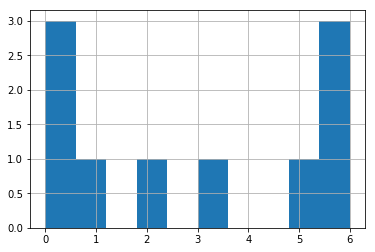

In [113]:
h = s.hist()

In [114]:
x = np.random.rand(100) * 6 - 3  # [-3, 3)

In [118]:
x

array([-2.98189987, -2.96387115, -2.92954469, -2.89915288, -2.85283213,
       -2.51802283, -2.37512588, -2.359511  , -2.20009877, -2.17638937,
       -2.15123483, -2.102608  , -2.00777013, -1.97328562, -1.97173555,
       -1.90332759, -1.8968036 , -1.86176716, -1.80440381, -1.7833546 ,
       -1.72767802, -1.67477512, -1.66605809, -1.66056526, -1.62463582,
       -1.57022481, -1.55646398, -1.44698327, -1.41632763, -1.41429965,
       -1.28697147, -1.11398952, -1.04918591, -1.04828396, -1.02680507,
       -0.887446  , -0.88029342, -0.87661757, -0.76198615, -0.73234615,
       -0.64642444, -0.50574497, -0.43784784, -0.40622559, -0.35432701,
       -0.2487803 , -0.21063814, -0.14355198, -0.14038487, -0.12230485,
       -0.07890977, -0.05247975,  0.04241095,  0.06186554,  0.07891327,
        0.16582447,  0.198847  ,  0.2243326 ,  0.27808101,  0.28922739,
        0.29492248,  0.30973741,  0.33754938,  0.33781051,  0.41006549,
        0.43334101,  0.44435273,  0.5573378 ,  0.5767775 ,  0.57

In [120]:
y = np.sin(x) + np.random.randn(100) * 0.05
y

array([-0.23234269, -0.22128046, -0.19146867, -0.23500145, -0.2489139 ,
       -0.59514369, -0.62567278, -0.78355812, -0.84347406, -0.75622767,
       -0.77297343, -0.82324208, -0.92961108, -0.88608896, -0.87809704,
       -0.85407928, -0.92362385, -0.99037714, -1.07705437, -0.9439083 ,
       -1.05850226, -1.00833828, -0.89097436, -0.95626545, -0.97761846,
       -1.07168538, -0.98105633, -0.94209145, -0.9668851 , -0.94689211,
       -0.98305387, -0.83052437, -0.81992258, -0.87135696, -0.87917155,
       -0.76019078, -0.761728  , -0.76471967, -0.65514823, -0.69523836,
       -0.60700551, -0.41557828, -0.37916247, -0.40191926, -0.34498295,
       -0.28993511, -0.26130674, -0.17974677, -0.26002489, -0.17874809,
       -0.06118059,  0.02876844,  0.04852321,  0.01168415,  0.0672235 ,
        0.10783291,  0.15902567,  0.27835168,  0.26298966,  0.26880629,
        0.30423631,  0.32000149,  0.30596591,  0.31370651,  0.41858654,
        0.39508042,  0.49681085,  0.61329042,  0.49929903,  0.55

In [121]:
x.reshape(-1, 1)

array([[-2.98189987],
       [-2.96387115],
       [-2.92954469],
       [-2.89915288],
       [-2.85283213],
       [-2.51802283],
       [-2.37512588],
       [-2.359511  ],
       [-2.20009877],
       [-2.17638937],
       [-2.15123483],
       [-2.102608  ],
       [-2.00777013],
       [-1.97328562],
       [-1.97173555],
       [-1.90332759],
       [-1.8968036 ],
       [-1.86176716],
       [-1.80440381],
       [-1.7833546 ],
       [-1.72767802],
       [-1.67477512],
       [-1.66605809],
       [-1.66056526],
       [-1.62463582],
       [-1.57022481],
       [-1.55646398],
       [-1.44698327],
       [-1.41632763],
       [-1.41429965],
       [-1.28697147],
       [-1.11398952],
       [-1.04918591],
       [-1.04828396],
       [-1.02680507],
       [-0.887446  ],
       [-0.88029342],
       [-0.87661757],
       [-0.76198615],
       [-0.73234615],
       [-0.64642444],
       [-0.50574497],
       [-0.43784784],
       [-0.40622559],
       [-0.35432701],
       [-0

In [122]:
x

array([-2.98189987, -2.96387115, -2.92954469, -2.89915288, -2.85283213,
       -2.51802283, -2.37512588, -2.359511  , -2.20009877, -2.17638937,
       -2.15123483, -2.102608  , -2.00777013, -1.97328562, -1.97173555,
       -1.90332759, -1.8968036 , -1.86176716, -1.80440381, -1.7833546 ,
       -1.72767802, -1.67477512, -1.66605809, -1.66056526, -1.62463582,
       -1.57022481, -1.55646398, -1.44698327, -1.41632763, -1.41429965,
       -1.28697147, -1.11398952, -1.04918591, -1.04828396, -1.02680507,
       -0.887446  , -0.88029342, -0.87661757, -0.76198615, -0.73234615,
       -0.64642444, -0.50574497, -0.43784784, -0.40622559, -0.35432701,
       -0.2487803 , -0.21063814, -0.14355198, -0.14038487, -0.12230485,
       -0.07890977, -0.05247975,  0.04241095,  0.06186554,  0.07891327,
        0.16582447,  0.198847  ,  0.2243326 ,  0.27808101,  0.28922739,
        0.29492248,  0.30973741,  0.33754938,  0.33781051,  0.41006549,
        0.43334101,  0.44435273,  0.5573378 ,  0.5767775 ,  0.57

In [123]:
np.reshape(x, (-1, 1))

array([[-2.98189987],
       [-2.96387115],
       [-2.92954469],
       [-2.89915288],
       [-2.85283213],
       [-2.51802283],
       [-2.37512588],
       [-2.359511  ],
       [-2.20009877],
       [-2.17638937],
       [-2.15123483],
       [-2.102608  ],
       [-2.00777013],
       [-1.97328562],
       [-1.97173555],
       [-1.90332759],
       [-1.8968036 ],
       [-1.86176716],
       [-1.80440381],
       [-1.7833546 ],
       [-1.72767802],
       [-1.67477512],
       [-1.66605809],
       [-1.66056526],
       [-1.62463582],
       [-1.57022481],
       [-1.55646398],
       [-1.44698327],
       [-1.41632763],
       [-1.41429965],
       [-1.28697147],
       [-1.11398952],
       [-1.04918591],
       [-1.04828396],
       [-1.02680507],
       [-0.887446  ],
       [-0.88029342],
       [-0.87661757],
       [-0.76198615],
       [-0.73234615],
       [-0.64642444],
       [-0.50574497],
       [-0.43784784],
       [-0.40622559],
       [-0.35432701],
       [-0

In [124]:
x

array([-2.98189987, -2.96387115, -2.92954469, -2.89915288, -2.85283213,
       -2.51802283, -2.37512588, -2.359511  , -2.20009877, -2.17638937,
       -2.15123483, -2.102608  , -2.00777013, -1.97328562, -1.97173555,
       -1.90332759, -1.8968036 , -1.86176716, -1.80440381, -1.7833546 ,
       -1.72767802, -1.67477512, -1.66605809, -1.66056526, -1.62463582,
       -1.57022481, -1.55646398, -1.44698327, -1.41632763, -1.41429965,
       -1.28697147, -1.11398952, -1.04918591, -1.04828396, -1.02680507,
       -0.887446  , -0.88029342, -0.87661757, -0.76198615, -0.73234615,
       -0.64642444, -0.50574497, -0.43784784, -0.40622559, -0.35432701,
       -0.2487803 , -0.21063814, -0.14355198, -0.14038487, -0.12230485,
       -0.07890977, -0.05247975,  0.04241095,  0.06186554,  0.07891327,
        0.16582447,  0.198847  ,  0.2243326 ,  0.27808101,  0.28922739,
        0.29492248,  0.30973741,  0.33754938,  0.33781051,  0.41006549,
        0.43334101,  0.44435273,  0.5573378 ,  0.5767775 ,  0.57

In [125]:
y

array([-0.23234269, -0.22128046, -0.19146867, -0.23500145, -0.2489139 ,
       -0.59514369, -0.62567278, -0.78355812, -0.84347406, -0.75622767,
       -0.77297343, -0.82324208, -0.92961108, -0.88608896, -0.87809704,
       -0.85407928, -0.92362385, -0.99037714, -1.07705437, -0.9439083 ,
       -1.05850226, -1.00833828, -0.89097436, -0.95626545, -0.97761846,
       -1.07168538, -0.98105633, -0.94209145, -0.9668851 , -0.94689211,
       -0.98305387, -0.83052437, -0.81992258, -0.87135696, -0.87917155,
       -0.76019078, -0.761728  , -0.76471967, -0.65514823, -0.69523836,
       -0.60700551, -0.41557828, -0.37916247, -0.40191926, -0.34498295,
       -0.28993511, -0.26130674, -0.17974677, -0.26002489, -0.17874809,
       -0.06118059,  0.02876844,  0.04852321,  0.01168415,  0.0672235 ,
        0.10783291,  0.15902567,  0.27835168,  0.26298966,  0.26880629,
        0.30423631,  0.32000149,  0.30596591,  0.31370651,  0.41858654,
        0.39508042,  0.49681085,  0.61329042,  0.49929903,  0.55